In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sys
import os


In [7]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from utils.normales import funcion_normal

### Mixture de normales
- No es lo mismo una combinacion lineal que una mixture, en una mixture los coeficientes ${\alpha_i}$ suman 1 esto es ${\sum{\alpha_i}}=1$. 
- Sean dos variables aleatorias ${X_1 \sim \mathcal{N}(-1,9)}$ y ${X_2 \sim \mathcal{N}(-1,4)}$. Mezclarlas con 0.4 y 0.6 tal que la función de densidad queda: 

0.4 ${\phi_1(x)}$+0.6 ${\phi_2(x)}$ 
donde: 

${\phi_1(x)=\frac{1}{{\sqrt(18*\pi)}}e ^{-\frac{(x+1)^2}{18}}}$

${\phi_2(x)=\frac{1}{{\sqrt(8*\pi)}}e ^{-\frac{(x+1)^2}{8}}}$

#### a) graficar la pdf de l mixtura para valores del sporte de la variable aleatoria entre =10 y 10 con deltas de 0.1

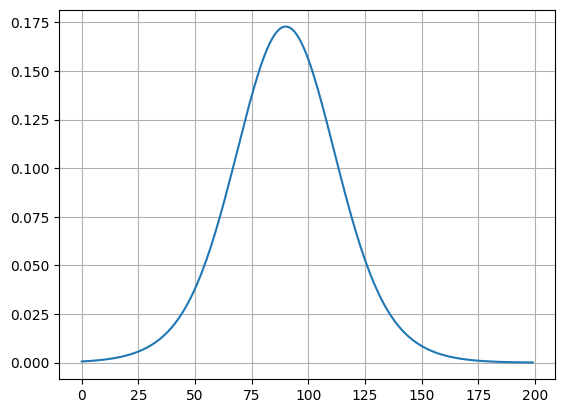

In [8]:
datos=np.arange(start=-10,stop=10,step=0.1)

df_datos=pd.DataFrame(datos,columns=['datos'])

df_datos['phi_1']=df_datos['datos'].apply(funcion_normal,media=-1,varianza=9)

df_datos['phi_2']=df_datos['datos'].apply(funcion_normal,media=-1,varianza=4)

df_datos['mixture_1']=0.4*df_datos['phi_1']+0.6*df_datos['phi_2']

df_datos['mixture_1'].plot().grid()

### b) Solamente observando el gráfico, se puede afirmar que la mixture es asimétrica. 
Rta: en principio si. parece estar centrada en (100/75)/2 pero ligeramente corrida hacia la iza, es esto es, una asimetría positiva (cola iza mas larga?)

### c) Calcular media, varianza y el coeficiente de asimetria y el de curtosis de la mixtura

Media: 0.0500
Varianza 0.0035
Coeficiente de asimetría: 0.9479567894208701
Curtosis: 2.380375669489545
Curtosis en Exceso: -0.619624330510455


<Axes: >

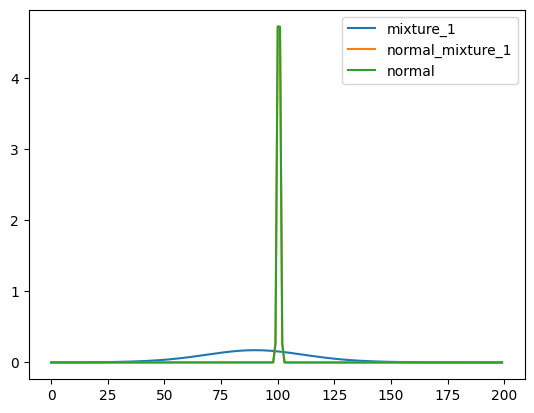

In [9]:
from scipy.stats import norm

print(f"Media: {df_datos['mixture_1'].mean():0.4f}")
print(f"Varianza {df_datos['mixture_1'].std()**2:0.4f}")
print(f"Coeficiente de asimetría: {df_datos['mixture_1'].skew()}")
print(f"Curtosis: {df_datos['mixture_1'].kurtosis()+3}")
print(f"Curtosis en Exceso: {df_datos['mixture_1'].kurtosis()}")

varianza=df_datos['mixture_1'].std()**2
desvio=np.sqrt(varianza)
media=df_datos['mixture_1'].mean()
#Genero una normal con la misma media y varianza que la mixtura

df_datos['normal_mixture_1']=df_datos['datos'].apply(funcion_normal,media=media,varianza=varianza)



normal = norm.pdf(df_datos['datos'], loc=media, scale=desvio) ## genero una funcion de distribucion normal con python para ver que la que tengo a mano da lo mismo
df_datos['normal']=pd.DataFrame(normal)

df_datos['mixture_1'].plot(legend='mixture_1')
df_datos['normal_mixture_1'].plot(legend='normal_mixture_1')
df_datos['normal'].plot(legend='normal')
    



En funcion de las variables es platicurtica (KE<0).
Es asimétrica positiva (cerca de 1  y deberia ser cero)

### j) Muestra de 2000 valores aleatorios de la mixtura y hacer un QQplot

### Asimetria y Curtosis

Asimetría: -0.6233243530752525
Curtosis en Exeso:  -0.16045655008982962


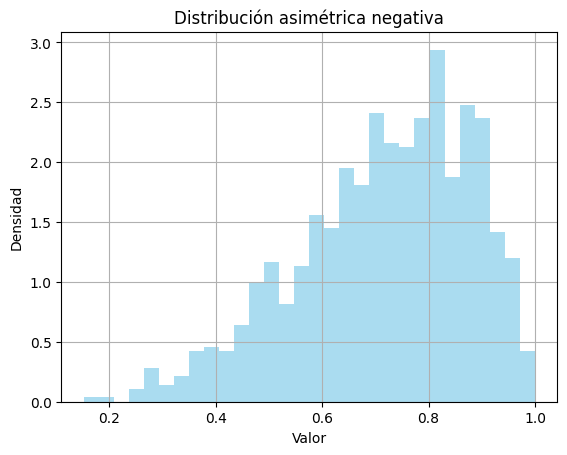

In [15]:

from scipy.stats import skew
from scipy.stats import kurtosis

# Distribución Beta(2, 5): asimétrica positiva
data_pos = np.random.beta(a=2, b=5, size=1000)

# Reflejar para obtener asimetría negativa
data_neg = 1 - data_pos

# Ver asimetría
print("Asimetría:", skew(data_neg))
print("Curtosis en Exeso: ",kurtosis(data_neg))
# Graficar
plt.hist(data_neg, bins=30, density=True, alpha=0.7, color='skyblue')
plt.title("Distribución asimétrica negativa")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()


#### Curtosis en exceso=0 y asimetrica negativa

Asimetría: -0.8531
Curtosis (exceso, Fisher): 0.7358


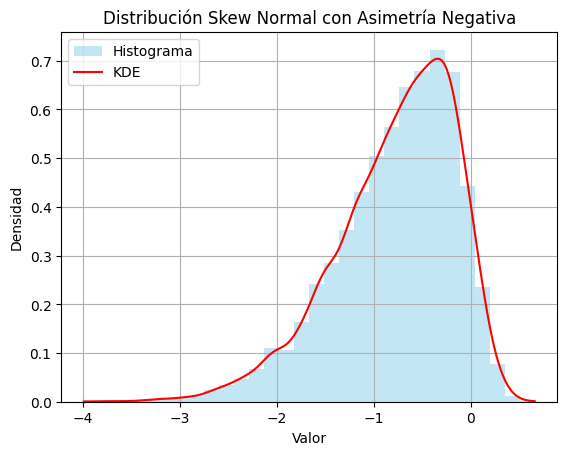

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, skewnorm
from scipy.stats import gaussian_kde

# Parámetro negativo para asimetría negativa
shape = -5

# Generamos datos
data = skewnorm.rvs(a=shape, size=10000)

# Estadísticas
asimetria = skew(data)
curtosis_fisher = kurtosis(data)

print(f"Asimetría: {asimetria:.4f}")
print(f"Curtosis (exceso, Fisher): {curtosis_fisher:.4f}")

# Graficar histograma + KDE
plt.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', label='Histograma')
kde = gaussian_kde(data)
x = np.linspace(min(data), max(data), 200)
plt.plot(x, kde(x), color='red', label='KDE')
plt.title("Distribución Skew Normal con Asimetría Negativa")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


#### Curtosis execso=0 y asimetrica positva

Asimetría: 0.8714
Curtosis (exceso, Fisher): 0.7993


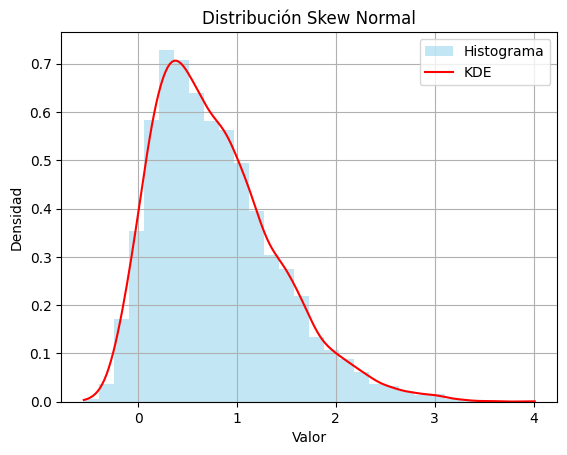

In [16]:
from scipy.stats import skew, kurtosis, skewnorm

# Parámetro de asimetría: positivo para asimetría positiva, negativo para negativa
shape = 5  # probá con diferentes valores como -5, 3, -3

# Generar datos de skew normal
data = skewnorm.rvs(a=shape, size=10000)

# Estadísticas
asimetria = skew(data)
curtosis_fisher = kurtosis(data, fisher=True)

print(f"Asimetría: {asimetria:.4f}")
print(f"Curtosis (exceso, Fisher): {curtosis_fisher:.4f}")

# Graficar KDE + histograma
plt.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', label='Histograma')
from scipy.stats import gaussian_kde
kde = gaussian_kde(data)
x = np.linspace(min(data), max(data), 200)
plt.plot(x, kde(x), color='red', label='KDE')
plt.title("Distribución Skew Normal")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()
